## Import Statements

In [1]:
# General
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset

# Paths and Files
from pathlib import Path
import os

# Data Processing
from sklearn.preprocessing import StandardScaler

# Model development and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Plotting
import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick # Used to reformat a plot axis as a percentage
import hvplot.pandas
import seaborn as sns

# Quality of life improvements
import warnings
warnings.filterwarnings('ignore') # Filter out warnings to improve readability

---

## Loading the Data

In [2]:
# 10-year Treasury Bonds

# Initialize an empty dataframe
ten_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/10_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    ten_year_treasury_bond_df = pd.concat(
        [
            ten_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
ten_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
ten_year_treasury_bond_df.index = pd.to_datetime(ten_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
ten_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

ten_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1980-01-02,10.482,10.482,10.482,10.482,1.67%
1980-01-03,10.584,10.584,10.584,10.584,0.97%
1980-01-04,10.636,10.636,10.636,10.636,0.49%
1980-01-07,10.610,10.610,10.610,10.610,-0.24%
1980-01-08,10.553,10.553,10.553,10.553,-0.54%


In [3]:
# 2-year Treasury Bonds

# Initialize an empty dataframe
two_year_treasury_bond_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Change %"])

# Set the folder path
folder_path = Path("./Resources/2_year_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    two_year_treasury_bond_df = pd.concat(
        [
            two_year_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
two_year_treasury_bond_df.set_index('Date', inplace=True)

# Format the index as a datetime
two_year_treasury_bond_df.index = pd.to_datetime(two_year_treasury_bond_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
two_year_treasury_bond_df.sort_values(by=['Date'], inplace=True)

two_year_treasury_bond_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
1988-02-26,7.159,7.159,7.159,7.159,-0.47%
1988-02-29,7.125,7.125,7.125,7.125,-0.47%
1988-03-01,7.108,7.108,7.108,7.108,-0.24%
1988-03-02,7.090,7.090,7.090,7.090,-0.25%
1988-03-03,7.090,7.090,7.090,7.090,0.00%


In [4]:
# 3-month Treasury Bonds

# Initialize an empty dataframe
three_month_treasury_bond_df = pd.DataFrame(columns=["DATE","DTB3"])

# Set the folder path
folder_path = Path("./Resources/3_month_treasury_bond")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    three_month_treasury_bond_df = pd.concat(
        [
            three_month_treasury_bond_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
three_month_treasury_bond_df.set_index('DATE', inplace=True)

# Format the index as a datetime
three_month_treasury_bond_df.index = pd.to_datetime(three_month_treasury_bond_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
three_month_treasury_bond_df.sort_values(by=['DATE'], inplace=True)

three_month_treasury_bond_df.head()

,DTB3
DATE,
1954-01-04,1.330
1954-01-05,1.280
1954-01-06,1.280
1954-01-07,1.310
1954-01-08,1.310


In [5]:
# S&P Prices (OLD)

# Initialize an empty dataframe
sp500_old_df = pd.DataFrame(columns=["Date","Price","Open","High","Low","Vol.","Change %"])

# Set the folder path
folder_path = Path("./Resources/sp500_old")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_old_df = pd.concat(
        [
            sp500_old_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_old_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_old_df.index = pd.to_datetime(sp500_old_df.index, format='%m/%d/%Y')

# Sort the values by Date ascending
sp500_old_df.sort_values(by=['Date'], inplace=True)

sp500_old_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1979-12-26,107.8,107.8,108.4,107.1,NaN,0.09%
1979-12-27,108.0,108.0,108.5,107.1,NaN,0.19%
1979-12-28,107.8,107.8,108.6,107.2,NaN,-0.19%
1979-12-31,107.9,107.9,108.5,107.3,NaN,0.09%
1980-01-01,107.9,107.9,107.9,107.9,NaN,0.00%


In [9]:
# S&P Prices

# Initialize an empty dataframe
sp500_df = pd.DataFrame(columns=["Date","Open","High","Low","Close","Adj Close","Volume"])

# Set the folder path
folder_path = Path("./Resources/sp500")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    sp500_df = pd.concat(
        [
            sp500_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
sp500_df.set_index('Date', inplace=True)

# Format the index as a datetime
sp500_df.index = pd.to_datetime(sp500_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
sp500_df.sort_values(by=['Date'], inplace=True)

sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000


In [6]:
# T-Bill Summary

# Initialize an empty dataframe
tbill_summary_df = pd.DataFrame(columns=["date","US1M","US3M","US6M","US1Y","US2Y","US3Y","US5Y","US7Y","US10Y","US20Y","US30Y"])

# Set the folder path
folder_path = Path("./Resources/summary_spreadsheet")

# Create an array of each file in the folder located at the path
array_of_filenames = [filename for filename in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, filename))]

# For each file in the folder, append its contents to the initialized dataframe
for filename in array_of_filenames:
    tbill_summary_df = pd.concat(
        [
            tbill_summary_df,
            pd.read_csv(
                Path(str(folder_path) + "/" + filename)
            )
        ]
        , ignore_index=True
    )

# Set the index to be the date
tbill_summary_df.set_index('date', inplace=True)

# Format the index as a datetime
tbill_summary_df.index = pd.to_datetime(tbill_summary_df.index, format='%Y-%m-%d')

# Sort the values by Date ascending
tbill_summary_df.sort_values(by=['date'], inplace=True)

tbill_summary_df.head()

,US1M,US3M,US6M,US1Y,US2Y,US3Y,US5Y,US7Y,US10Y,US20Y,US30Y
date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [7]:
# Review the tbill_summary_df
# tbill_summary_df.loc[tbill_summary_df['US30Y'].isna() != True].head()

<Axes: xlabel='date'>

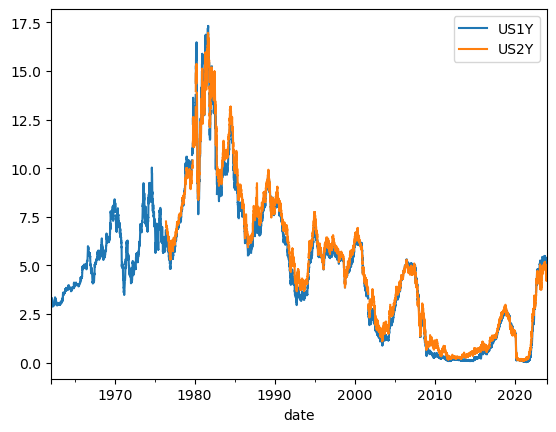

In [8]:
tbill_summary_df[['US1Y','US2Y']].plot()

In [71]:
sp500_observations_df = sp500_df[['Close','Adj Close']].copy()

sp500_observations_df['Rolling_4'] = sp500_observations_df['Adj Close'].rolling(window=4).mean()
sp500_observations_df['Rolling_10'] = sp500_observations_df['Adj Close'].rolling(window=10).mean()
sp500_observations_df['Rolling_15'] = sp500_observations_df['Adj Close'].rolling(window=15).mean()
sp500_observations_df['Rolling_20'] = sp500_observations_df['Adj Close'].rolling(window=20).mean()
sp500_observations_df['Rolling_25'] = sp500_observations_df['Adj Close'].rolling(window=25).mean()

sp500_observations_df['Signal_1'] = 0.0
sp500_observations_df.loc[(sp500_observations_df['Rolling_10'] >= sp500_observations_df['Rolling_25']), 'Signal_1'] = 1

sp500_observations_df = sp500_observations_df.dropna()

sp500_observations_df[['Rolling_10','Rolling_25','Signal_1']].head()

,Rolling_10,Rolling_25,Signal_1
Date,,,
1962-02-05,68.702999,69.1376,0.0
1962-02-06,68.869999,69.0976,0.0
1962-02-07,69.071998,69.0692,1.0
1962-02-08,69.294999,69.0668,1.0
1962-02-09,69.530000,69.0996,1.0


<Axes: xlabel='Date'>

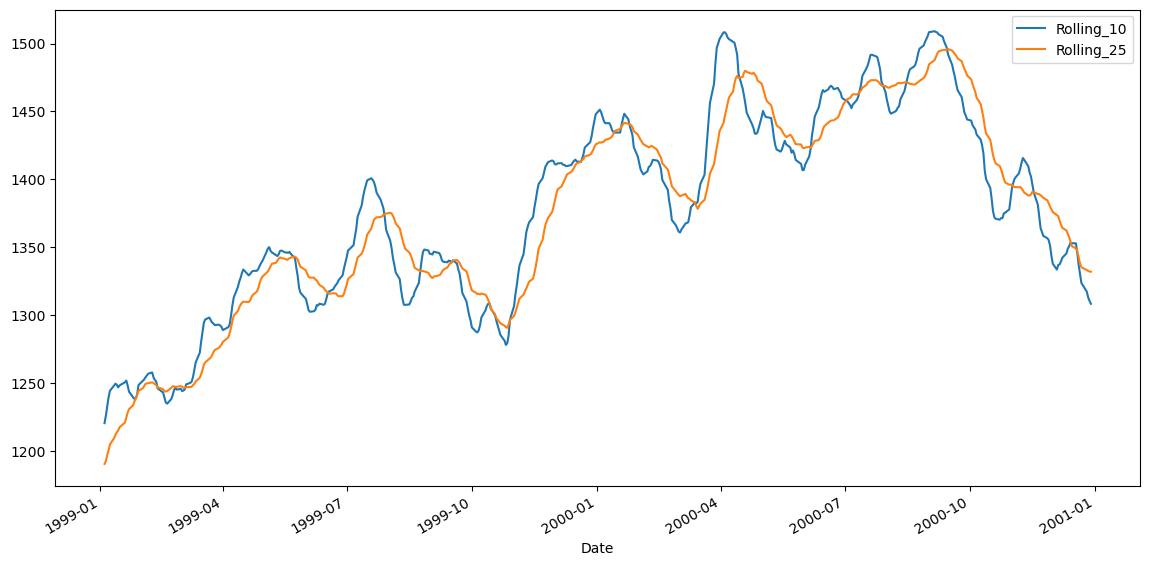

In [61]:
# sp500_observations_df.loc[sp500_observations_df.index > "2023-09-01"].plot()
sp500_observations_df[[
    # 'Adj Close'
    # , 
# 'Rolling_4'
    # , 
'Rolling_10'
    # , 
# 'Rolling_15'
# 'Rolling_20'
    , 'Rolling_25'
]]["1999-01-01":"2001-01-01"].plot(
    figsize=(14,7)
)

# tbill_summary_df.loc[tbill_summary_df['US30Y'].isna() != True].head()

<Axes: xlabel='Date'>

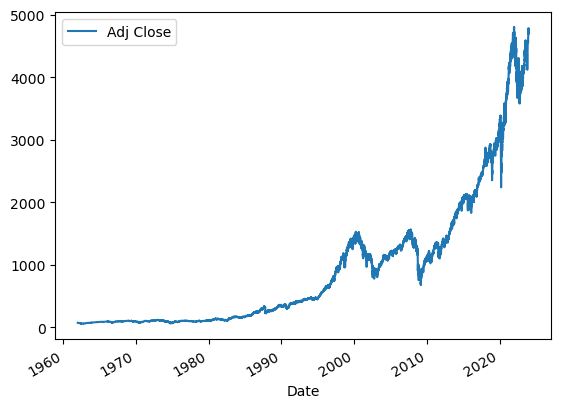

In [10]:
sp500_df[['Adj Close']].plot()

In [79]:
results_df = pd.DataFrame(sp500_observations_df['Adj Close'].pct_change())

results_df['ideal_returns'] = sp500_observations_df['Adj Close'].pct_change() * sp500_observations_df['Signal_1'].shift()

results_df.head(50)

,Adj Close,ideal_returns
Date,,
1962-02-05,NaN,NaN
1962-02-06,0.001145,0.000000
1962-02-07,0.006575,0.000000
1962-02-08,0.002272,0.002272
1962-02-09,-0.001417,-0.001417
1962-02-12,-0.000284,-0.000284
1962-02-13,-0.000142,-0.000142
1962-02-14,-0.000426,-0.000426
1962-02-15,0.004544,0.004544


<Axes: xlabel='Date'>

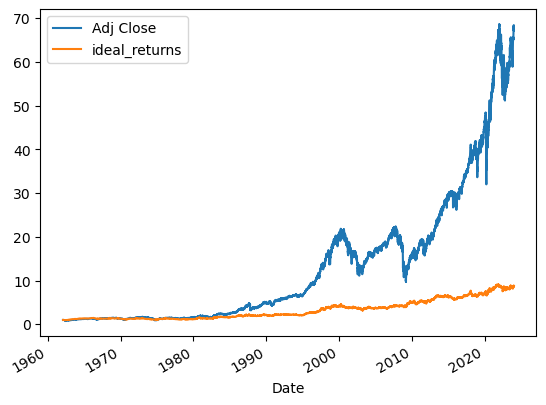

In [76]:
(1+results_df).cumprod().plot()